In [ ]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import pdist
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

# **Data Overview dan Data Preprocessing**

In [ ]:
# Membaca file CSV menjadi DataFrame
data = pd.read_csv("stock_data.csv")

# Menampilkan DataFrame
print(data)

    Ticker Symbol                 Security             GICS Sector  \
0             AAL  American Airlines Group             Industrials   
1            ABBV                   AbbVie             Health Care   
2             ABT      Abbott Laboratories             Health Care   
3            ADBE        Adobe Systems Inc  Information Technology   
4             ADI     Analog Devices, Inc.  Information Technology   
..            ...                      ...                     ...   
335          YHOO               Yahoo Inc.  Information Technology   
336           YUM          Yum! Brands Inc  Consumer Discretionary   
337           ZBH   Zimmer Biomet Holdings             Health Care   
338          ZION            Zions Bancorp              Financials   
339           ZTS                   Zoetis             Health Care   

                GICS Sub Industry  Current Price  Price Change  Volatility  \
0                        Airlines      42.349998      9.999995    1.687151   
1  

In [ ]:
data.shape

(340, 15)

In [ ]:
df=data.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

Exploration Data Analysis:

No missing values in the dataframe
Four columns contain objects. Two of these columns are categorical.
Eleven numerical values

In [ ]:
df.isnull().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Price,340.0,8.086234e+01,9.805509e+01,4.500000e+00,3.855500e+01,5.970500e+01,9.288000e+01,1.274950e+03
Price Change,340.0,4.078194e+00,1.200634e+01,-4.712969e+01,-9.394838e-01,4.819505e+00,1.069549e+01,5.505168e+01
Volatility,340.0,1.525976e+00,5.917984e-01,7.331632e-01,1.134878e+00,1.385593e+00,1.695549e+00,4.580042e+00
ROE,340.0,3.959706e+01,9.654754e+01,1.000000e+00,9.750000e+00,1.500000e+01,2.700000e+01,9.170000e+02
Cash Ratio,340.0,7.002353e+01,9.042133e+01,0.000000e+00,1.800000e+01,4.700000e+01,9.900000e+01,9.580000e+02
Net Cash Flow,340.0,5.553762e+07,1.946365e+09,-1.120800e+10,-1.939065e+08,2.098000e+06,1.698108e+08,2.076400e+10
Net Income,340.0,1.494385e+09,3.940150e+09,-2.352800e+10,3.523012e+08,7.073360e+08,1.899000e+09,2.444200e+10
Earnings Per Share,340.0,2.776662e+00,6.587779e+00,-6.120000e+01,1.557500e+00,2.895000e+00,4.620000e+00,5.009000e+01
Estimated Shares Outstanding,340.0,5.770283e+08,8.458496e+08,2.767216e+07,1.588482e+08,3.096751e+08,5.731175e+08,6.159292e+09
P/E Ratio,340.0,3.261256e+01,4.434873e+01,2.935451e+00,1.504465e+01,2.081988e+01,3.176476e+01,5.280391e+02


In [ ]:
df.duplicated().sum()

0

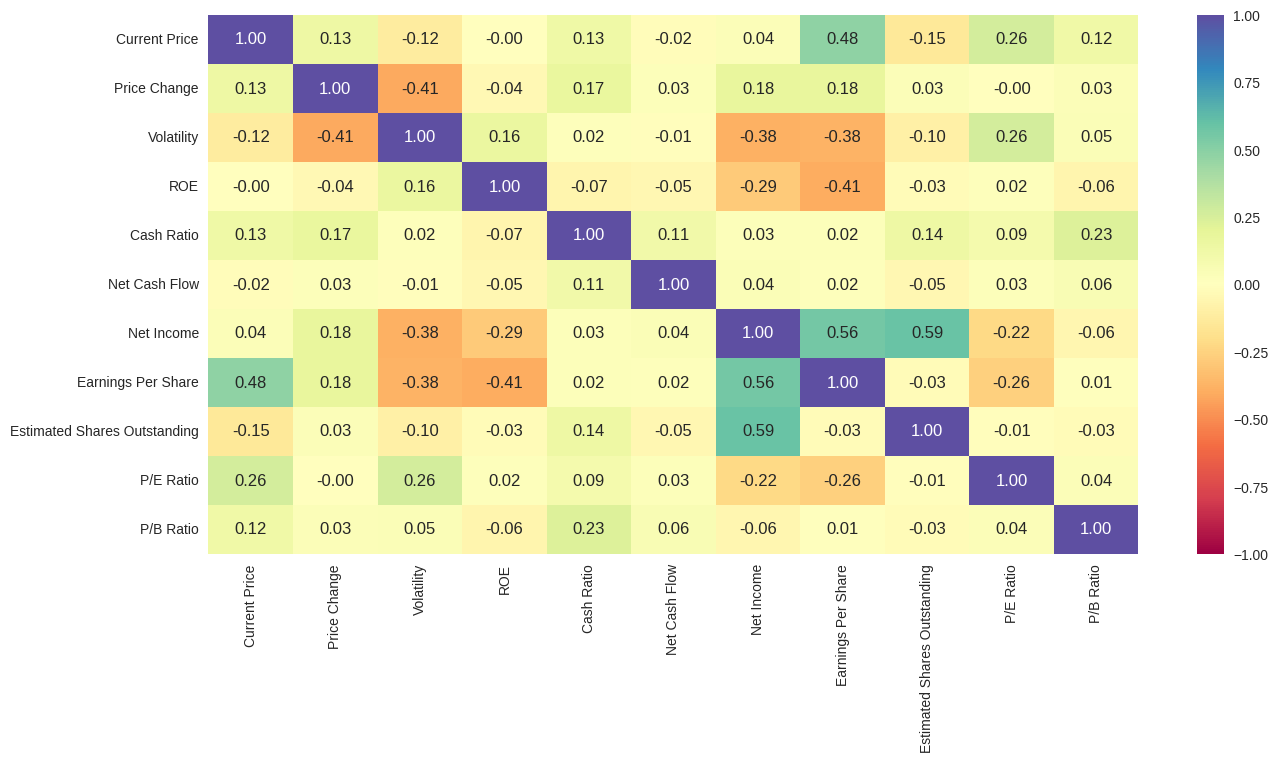

In [ ]:
#membuat heatmap dari korelasi antara fitur-fitur numerik dalam sebuah DataFrame
num_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

# **Data Exploration dan Data Analysis**

In [ ]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

Mean: 80.86
Median: 59.7


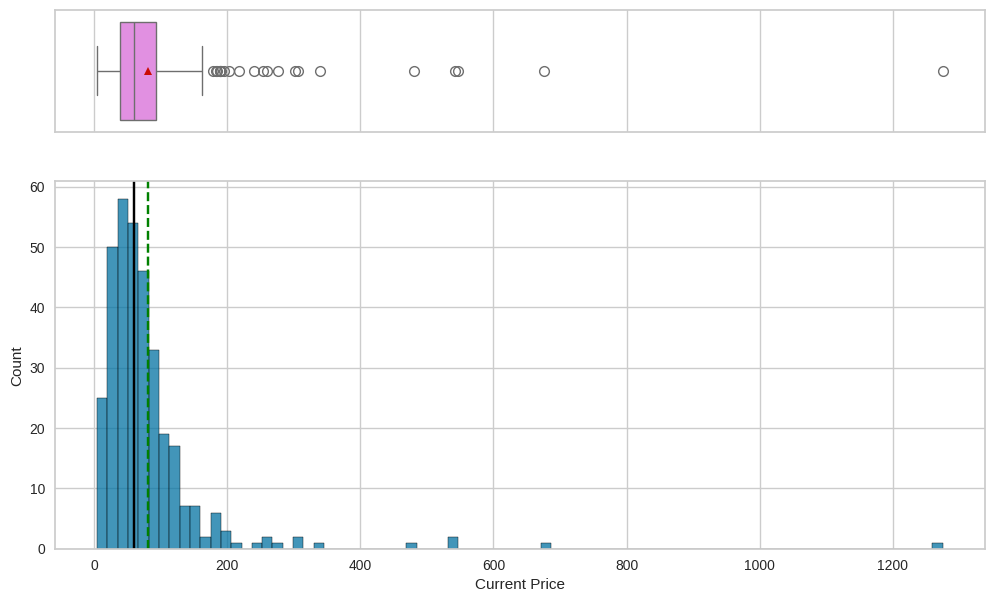

In [ ]:
#Menentukan Mean dan Median dari Current Price
histogram_boxplot(df,"Current Price")

print("Mean:",round(df["Current Price"].mean(),2))
print("Median:",round(df["Current Price"].median(),2))

In [ ]:
df.groupby(["GICS Sector"])["Price Change"].mean()

GICS Sector
Consumer Discretionary          5.846093
Consumer Staples                8.684750
Energy                        -10.228289
Financials                      3.865406
Health Care                     9.585652
Industrials                     2.833127
Information Technology          7.217476
Materials                       5.589738
Real Estate                     6.205548
Telecommunications Services     6.956980
Utilities                       0.803657
Name: Price Change, dtype: float64

<ipython-input-13-a5717ccca1fd>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Price Change", y="GICS Sector", data=grouped_data, palette="viridis")


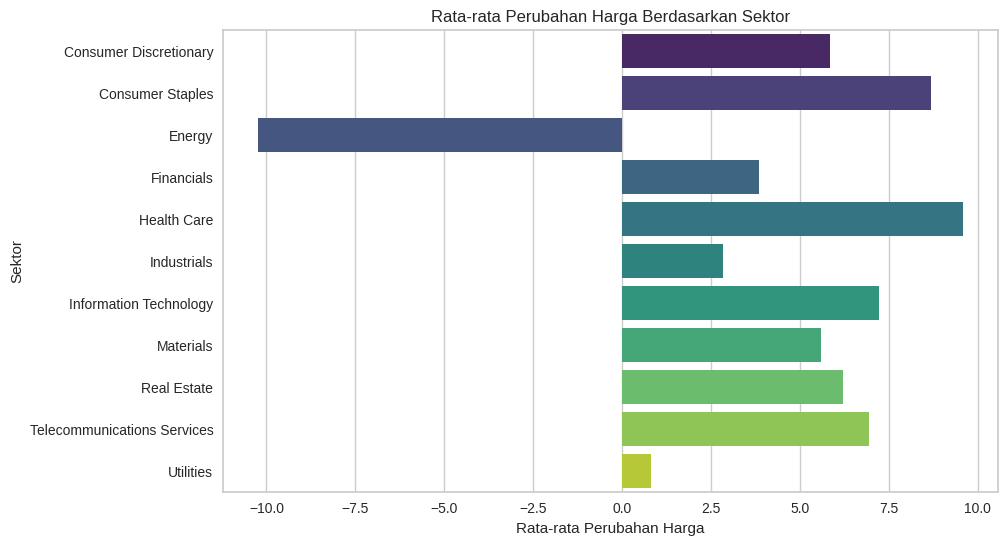

In [ ]:
# Dataframe telah dikelompokkan dan rata-rata dari kolom "Price Change" dihitung sebelumnya
# Simpan hasil groupby ke dalam variabel baru
grouped_data = df.groupby(["GICS Sector"])["Price Change"].mean().reset_index()

# Buat plot menggunakan seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x="Price Change", y="GICS Sector", data=grouped_data, palette="viridis")
plt.title("Rata-rata Perubahan Harga Berdasarkan Sektor")
plt.xlabel("Rata-rata Perubahan Harga")
plt.ylabel("Sektor")
plt.show()

<ipython-input-10-2d6e3186e275>:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
<ipython-input-10-2d6e3186e275>:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


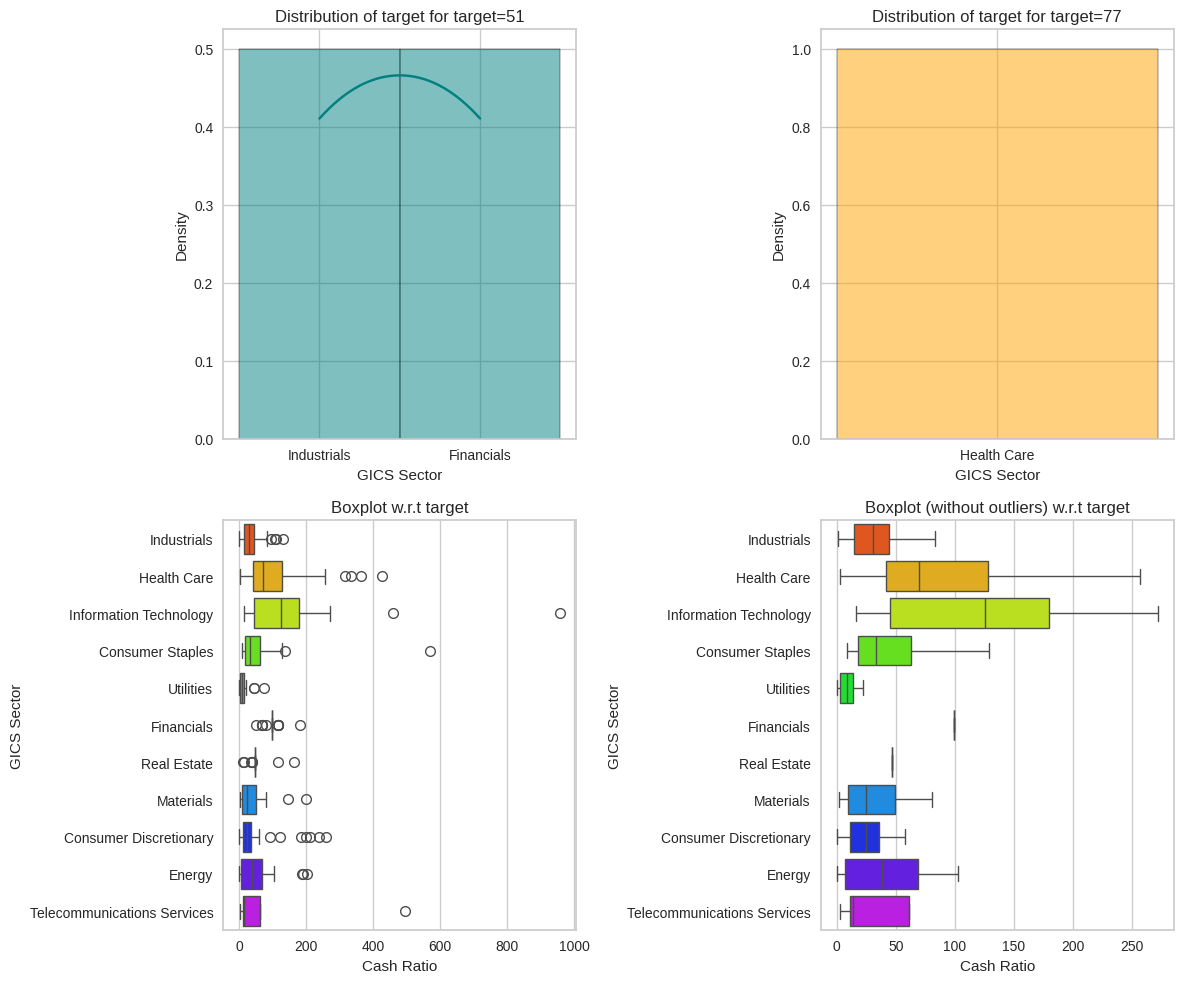

                    GICS Sector  Cash Ratio
6        Information Technology  149.818182
9   Telecommunications Services  117.000000
4                   Health Care  103.775000
3                    Financials   98.591837
1              Consumer Staples   70.947368
2                        Energy   51.133333
8                   Real Estate   50.111111
0        Consumer Discretionary   49.575000
7                     Materials   41.700000
5                   Industrials   36.188679
10                    Utilities   13.625000
Mean: 71.13322824215052
Median: 51.13333333333333


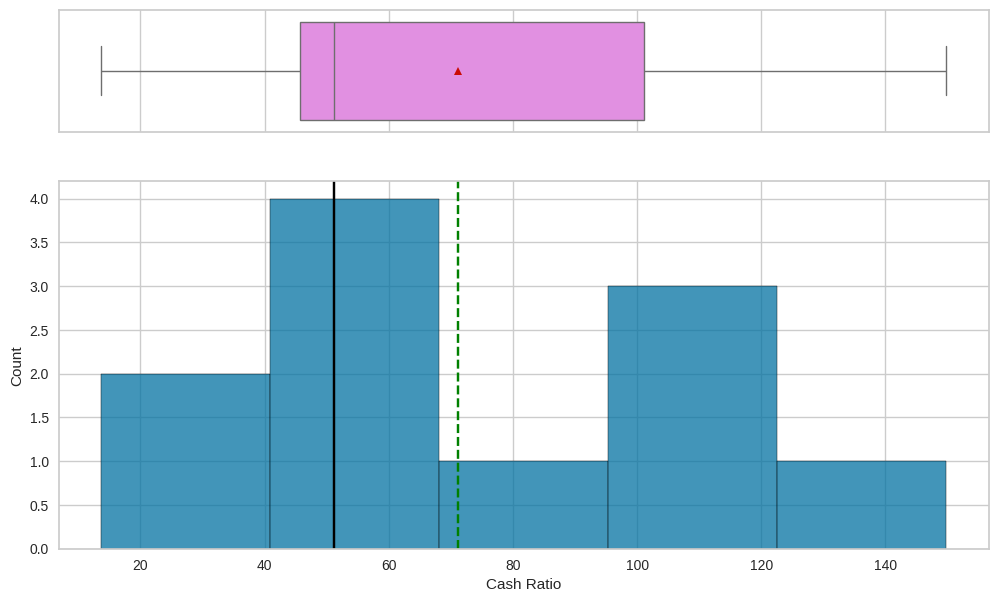

In [ ]:
distribution_plot_wrt_target(df, "GICS Sector", "Cash Ratio")

test = df.groupby(["GICS Sector"], as_index = False)["Cash Ratio"].mean().sort_values(by = "Cash Ratio", ascending = False)

histogram_boxplot(test, "Cash Ratio")

print(test)
print("Mean:", test["Cash Ratio"].mean())
print("Median:", test["Cash Ratio"].median())

<ipython-input-10-2d6e3186e275>:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
<ipython-input-10-2d6e3186e275>:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


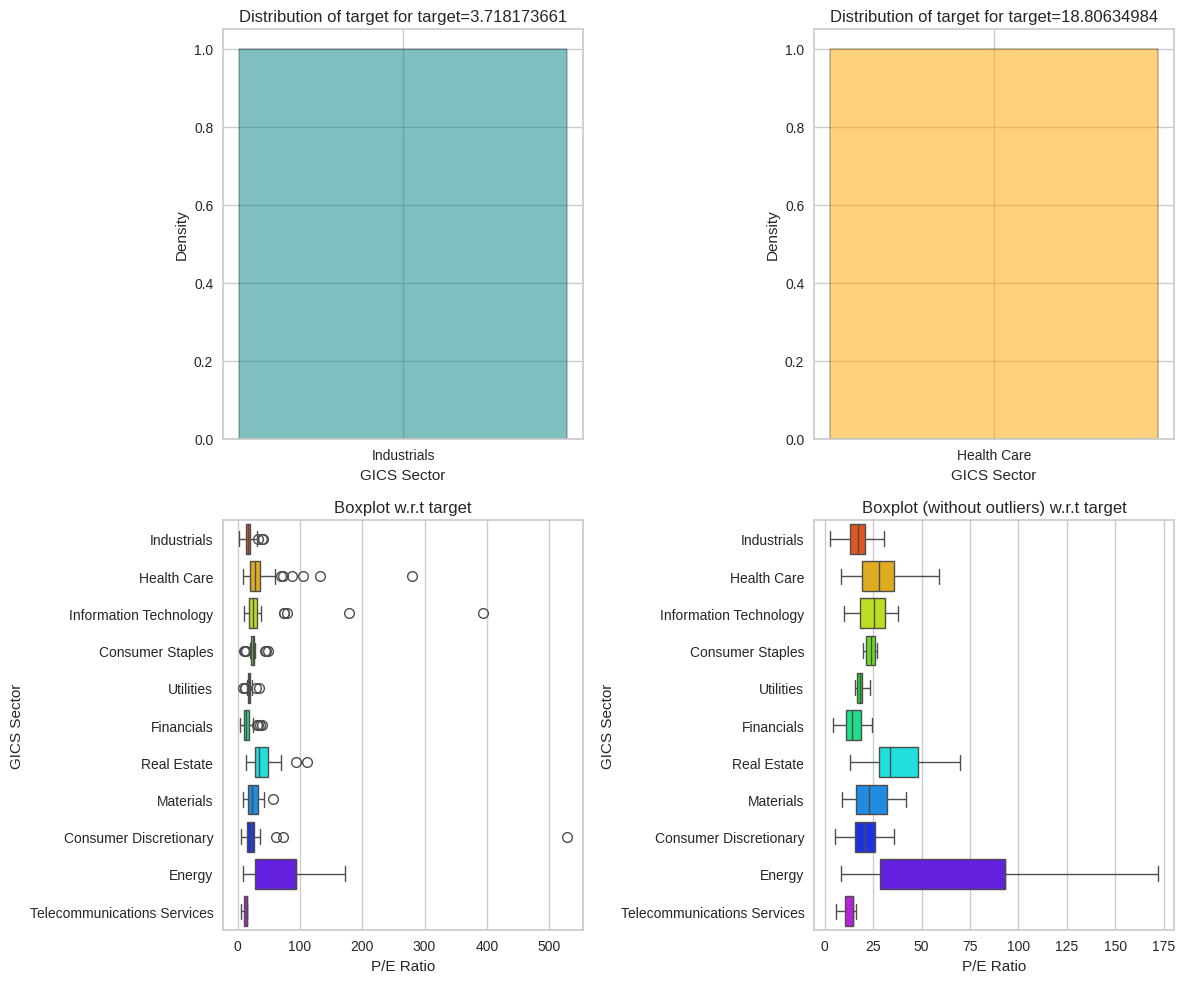

                    GICS Sector  P/E Ratio
2                        Energy  72.897709
6        Information Technology  43.782546
8                   Real Estate  43.065585
4                   Health Care  41.135272
0        Consumer Discretionary  35.211613
1              Consumer Staples  25.521195
7                     Materials  24.585352
10                    Utilities  18.719412
5                   Industrials  18.259380
3                    Financials  16.023151
9   Telecommunications Services  12.222578
Mean: 31.947617473805064
Median: 25.521195269526316


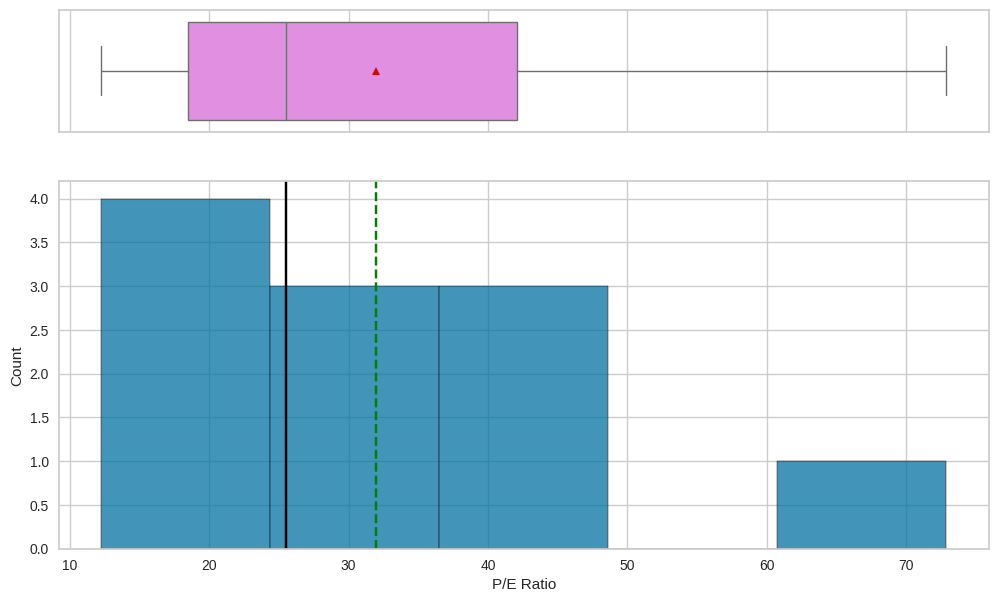

In [ ]:
distribution_plot_wrt_target(df, "GICS Sector", "P/E Ratio")

test = df.groupby(["GICS Sector"], as_index = False)["P/E Ratio"].mean().sort_values(by = "P/E Ratio", ascending = False)

histogram_boxplot(test, "P/E Ratio")

print(test)
print("Mean:", test["P/E Ratio"].mean())
print("Median:", test["P/E Ratio"].median())

# **Pembuatan Model K-Means Menggunakan Elbow Method**

In [ ]:
# Scaling data sebelum clustering
scaler = StandardScaler()
subset = df[num_cols].copy()
subset_scaled = scaler.fit_transform(subset)

# Creating a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

# Copy the scaled dataframe to be used in K-means and Hierarchical Clustering
scaled_k = subset_scaled_df.copy()
scaled_h = subset_scaled_df.copy()

In [ ]:
df_k = df.copy()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of Clusters: 1 	Average Distortion: 2.5425069919221697


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of Clusters: 2 	Average Distortion: 2.382318498894466


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of Clusters: 3 	Average Distortion: 2.2652173220958


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of Clusters: 4 	Average Distortion: 2.1771095455465415


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of Clusters: 5 	Average Distortion: 2.1243014843619172


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of Clusters: 6 	Average Distortion: 2.0893259312343346


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of Clusters: 7 	Average Distortion: 2.031548139220434


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of Clusters: 8 	Average Distortion: 1.9909334329046062


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

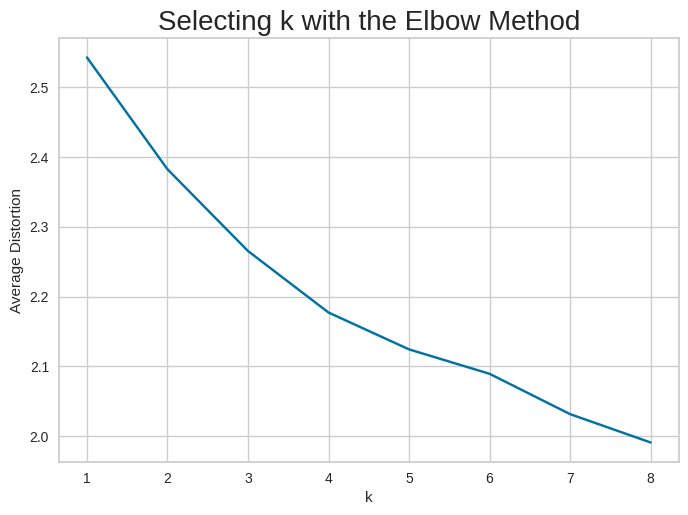

In [ ]:
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(scaled_k)
    prediction = model.predict(scaled_k)
    distortion = (
        sum(
            np.min(cdist(scaled_k, model.cluster_centers_, "euclidean"), axis=1)
        )
        / scaled_k.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, silhouette score is 0.43969639509980457


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3, silhouette score is 0.45797710447228496


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4, silhouette score is 0.45434371948348606


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5, silhouette score is 0.4026143914444224


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6, silhouette score is 0.4055715505889132


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7, silhouette score is 0.38841187868922616


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8, silhouette score is 0.33880939633015683


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9, silhouette score is 0.4147197108551414


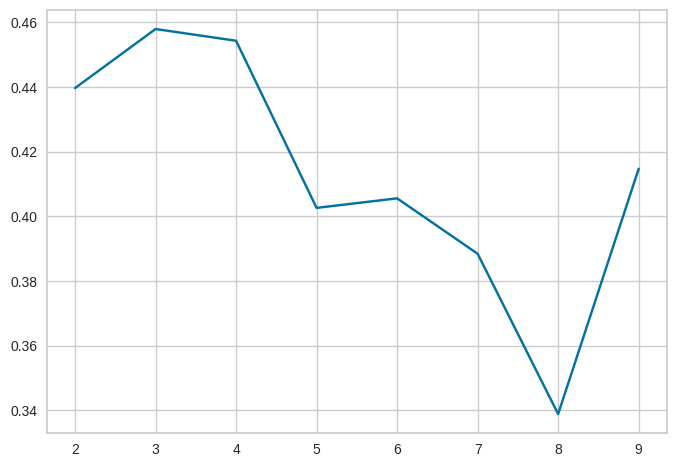

In [ ]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((scaled_k))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(scaled_k, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(scaled_k)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [ ]:
# adding kmeans cluster labels to the original dataframe
df_k["K_means_segments"] = kmeans.labels_

In [ ]:
import pandas as pd

# Pastikan tipe data kolom ROE adalah numerik
df_k['ROE'] = pd.to_numeric(df_k['ROE'], errors='coerce')  # Mengubah ke numerik, nilai non-numerik akan menjadi NaN

# Kelompokkan berdasarkan K_means_segments dan hitung rata-rata serta jumlah baris dalam setiap kelompok
cluster_profile = df_k.groupby("K_means_segments").agg({
    'ROE': 'mean',       # Hitung rata-rata ROE
    'K_means_segments': 'size'  # Hitung jumlah baris (jumlah observasi) dalam setiap kelompok
})

# Ubah nama kolom hasil size menjadi count_in_each_segment
cluster_profile.rename(columns={'K_means_segments': 'count_in_each_segment'}, inplace=True)

# Tampilkan cluster profiles dengan highlight nilai maksimum dalam setiap kolom
styled_cluster_profile = cluster_profile.style.highlight_max(color="green", axis=0)
styled_cluster_profile


,ROE,count_in_each_segment
K_means_segments,,
0,25.600000,25
1,107.074074,27
2,31.090909,11
3,34.620939,277


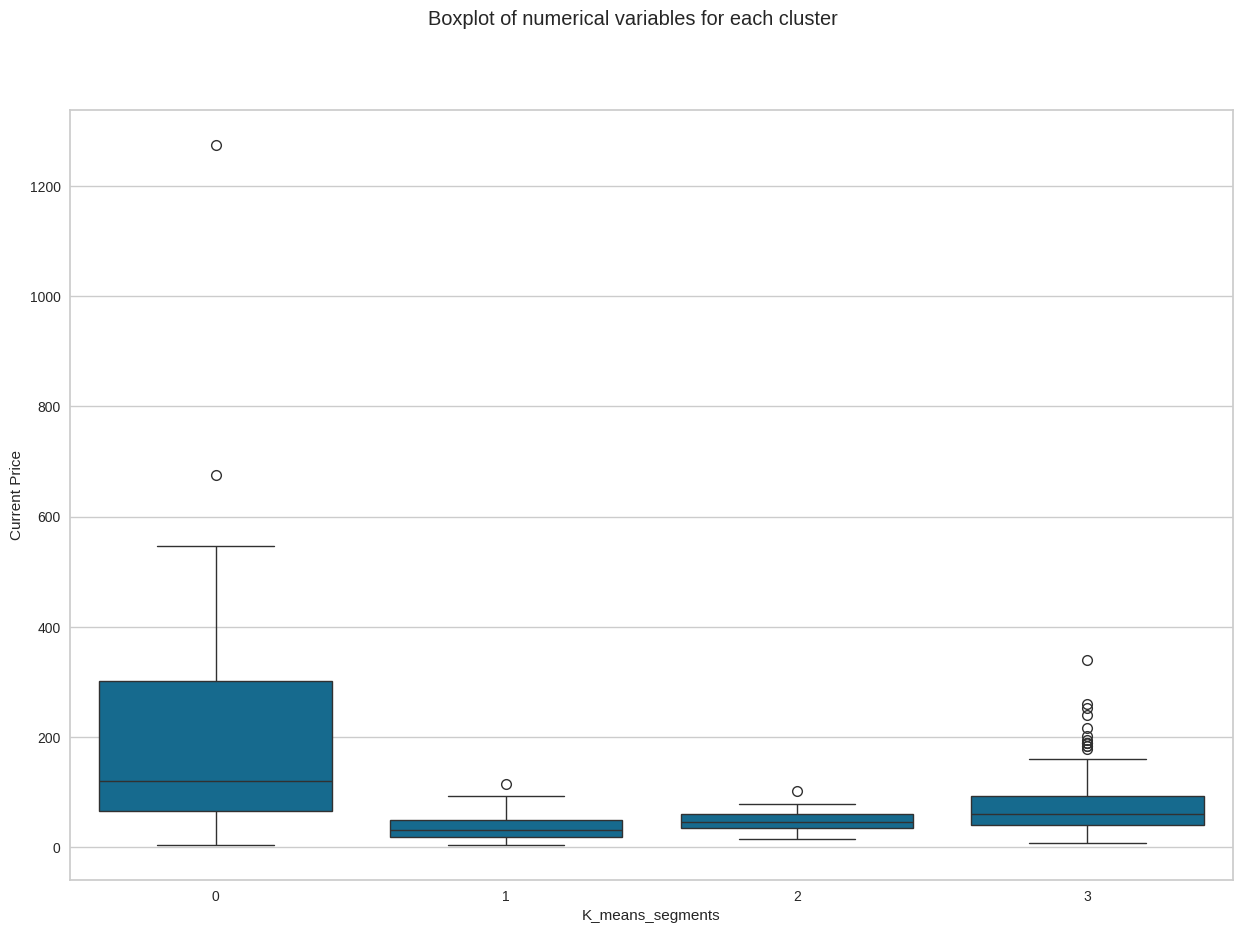

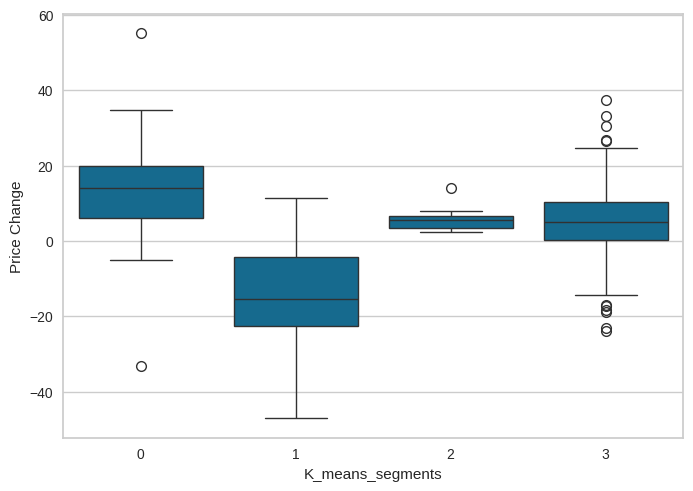

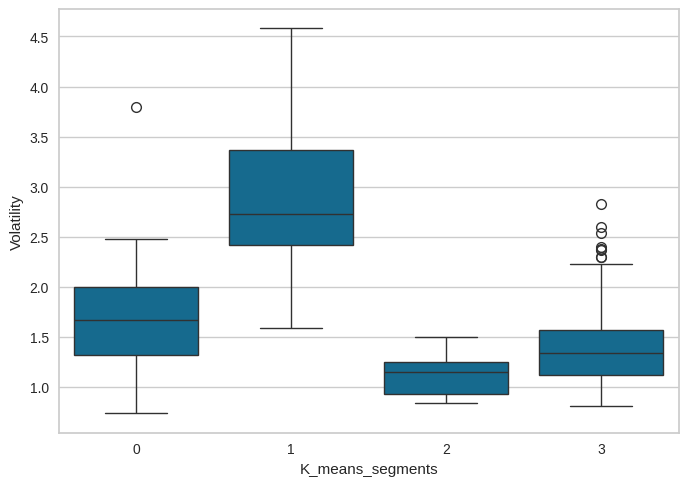

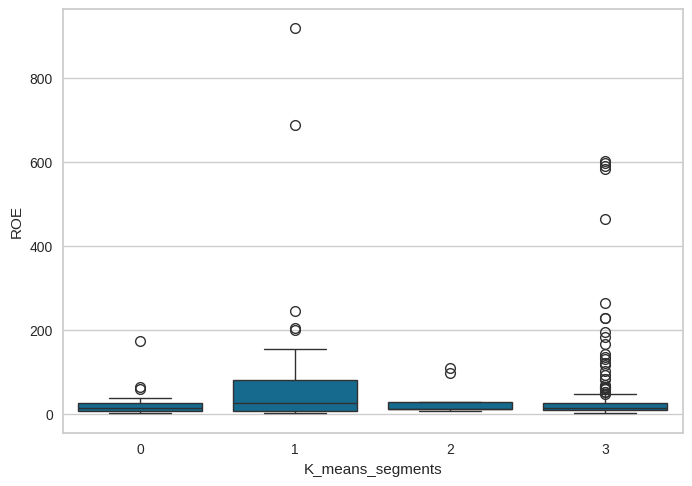

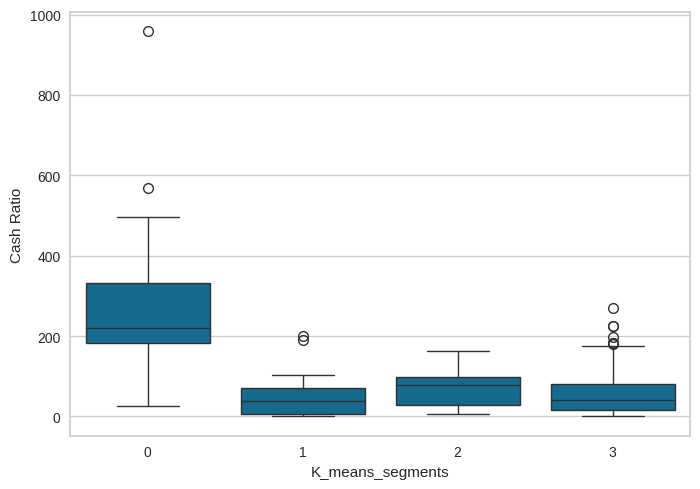

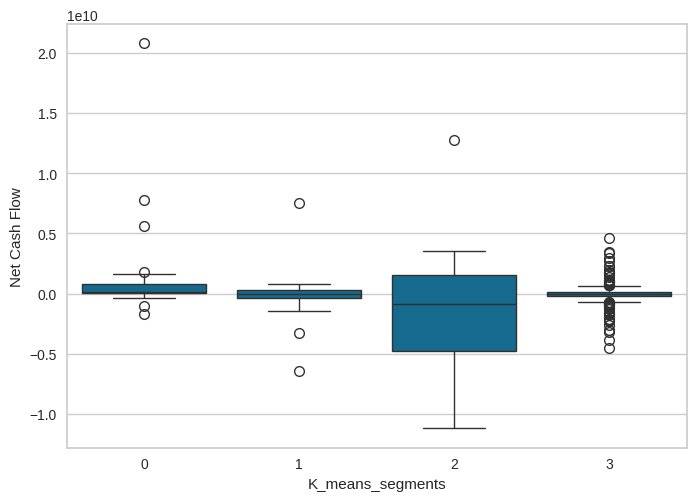

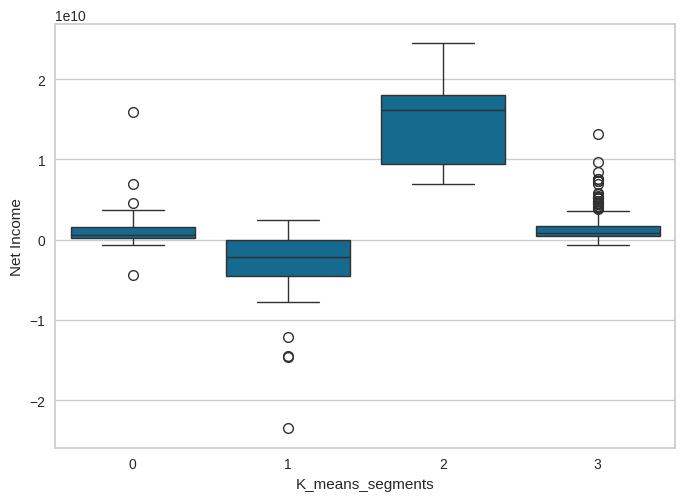

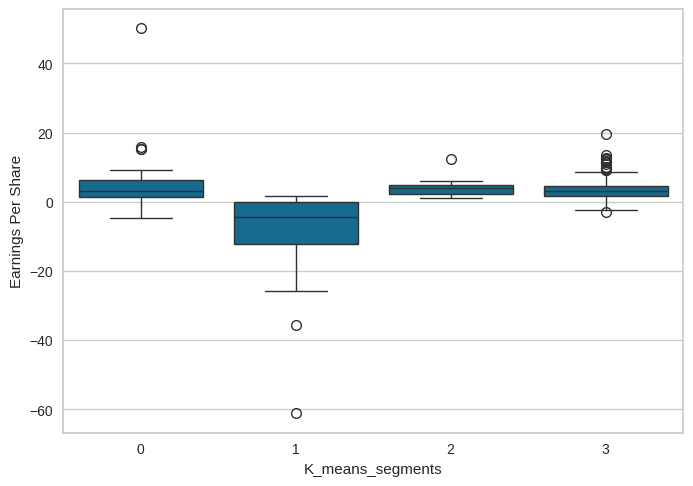

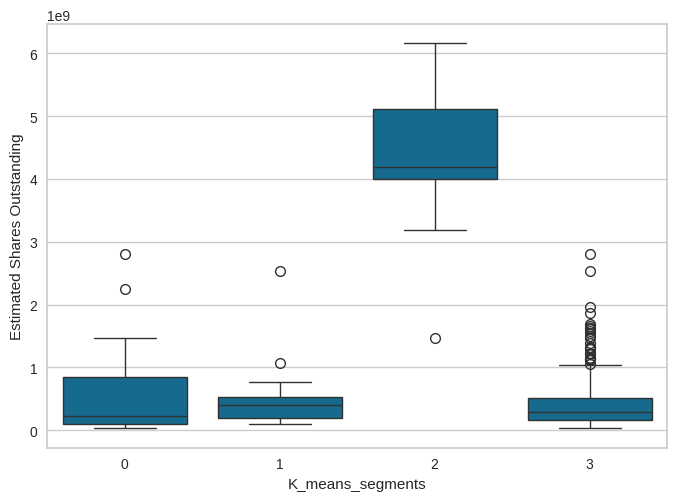

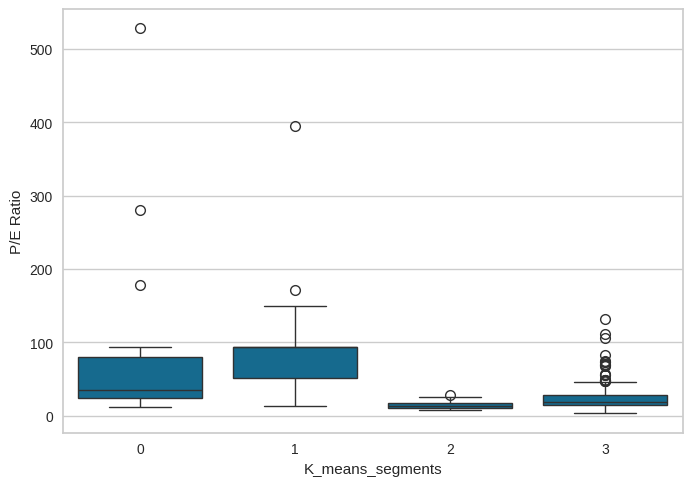

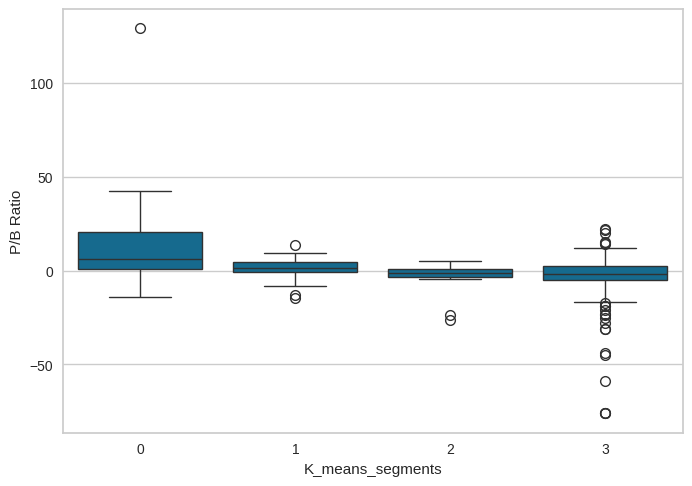

<Figure size 800x550 with 0 Axes>

In [ ]:
plt.figure(figsize=(15, 10))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_cols):
    # plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df_k, x="K_means_segments", y=variable)
    plt.show()

plt.tight_layout(pad=2.0)

# **Hasil Nama Perusahaan di Setiap Cluster**

In [ ]:
# Melihat setiap saham di tiap cluster yang telah di segmentasi
for cl in df_k["K_means_segments"].unique():
    print("In cluster {}, the following countries are present:".format(cl))
    print(df_k[df_k["K_means_segments"] == cl]["Security"].unique())
    print()


In cluster 3, the following countries are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castl

# **Evaluasi Model Silhotte Score, Inersia, DBI**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
# Misalkan scaled_k adalah data yang telah di-preprocessing dan siap untuk digunakan
# scaled_k = ... (pastikan data sudah di-scale jika diperlukan)

# Inisialisasi dan latih model K-Means dengan jumlah kluster (n_clusters) = 4
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(scaled_k)  # Lakukan clustering

# Lakukan prediksi klaster untuk setiap sampel dalam data
cluster_labels = kmeans.labels_

# Hitung nilai silhouette score
silhouette_avg = silhouette_score(scaled_k, cluster_labels)
print("Silhouette Score:", silhouette_avg)

inertia = kmeans.inertia_
print("Inertia:", inertia)

dbi = davies_bouldin_score(scaled_k, cluster_labels)
print("Davies-Bouldin Index (DBI):", dbi)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.4577225970476733
Inertia: 2609.702409639989
Davies-Bouldin Index (DBI): 1.6282393906899042
